In [1]:
import tensorflow as  tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

In [ ]:
tf.__version__

'2.18.0'

# Basics

In [ ]:
x = tf.constant([4,2],shape = (1,2), dtype=tf.float32)
print(x)

tf.Tensor([[4. 2.]], shape=(1, 2), dtype=float32)


In [ ]:
x = tf.ones((3,3))
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
x = tf.range(start=1,limit=20,delta=2)
x

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19], dtype=int32)>

In [ ]:
y = tf.range(start = 20,limit=40,delta=2)
y

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38], dtype=int32)>

In [ ]:
z = tf.add(x,y)
z

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([21, 25, 29, 33, 37, 41, 45, 49, 53, 57], dtype=int32)>

In [ ]:
z = tf.subtract(x,y)
z

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([-19, -19, -19, -19, -19, -19, -19, -19, -19, -19], dtype=int32)>

In [ ]:
z = tf.divide(x,y)
z

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.05      , 0.13636364, 0.20833333, 0.26923077, 0.32142857,
       0.36666667, 0.40625   , 0.44117647, 0.47222222, 0.5       ])>

In [ ]:
z = tf.multiply(x,y)
z

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 20,  66, 120, 182, 252, 330, 416, 510, 612, 722], dtype=int32)>

In [ ]:
x = tf.random.normal((2,4))
y = tf.random.normal((4,3))

z = tf.matmul(x,y)
print(z)

tf.Tensor(
[[ 1.5530462  0.4015124  0.3391365]
 [-2.6016033 -1.0017958 -3.4732432]], shape=(2, 3), dtype=float32)


# Neural Networks with Sequential and Functional API

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(-1,28*28).astype("float32")/255.0
x_test = x_test.reshape(-1,28*28).astype("float32")/255.0
x_train.shape

(60000, 784)

## Secuential API

In [ ]:
# Secuential API
modelSecAPI = keras.Sequential(
    [
        keras.Input(shape=(28*28,)),
        layers.Dense(512,activation="relu"),
        layers.Dense(256,activation="relu"),
        layers.Dense(10),
    ]
)

modelSecAPI.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

NameError: name 'keras' is not defined

In [ ]:
print(modelSecAPI.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None


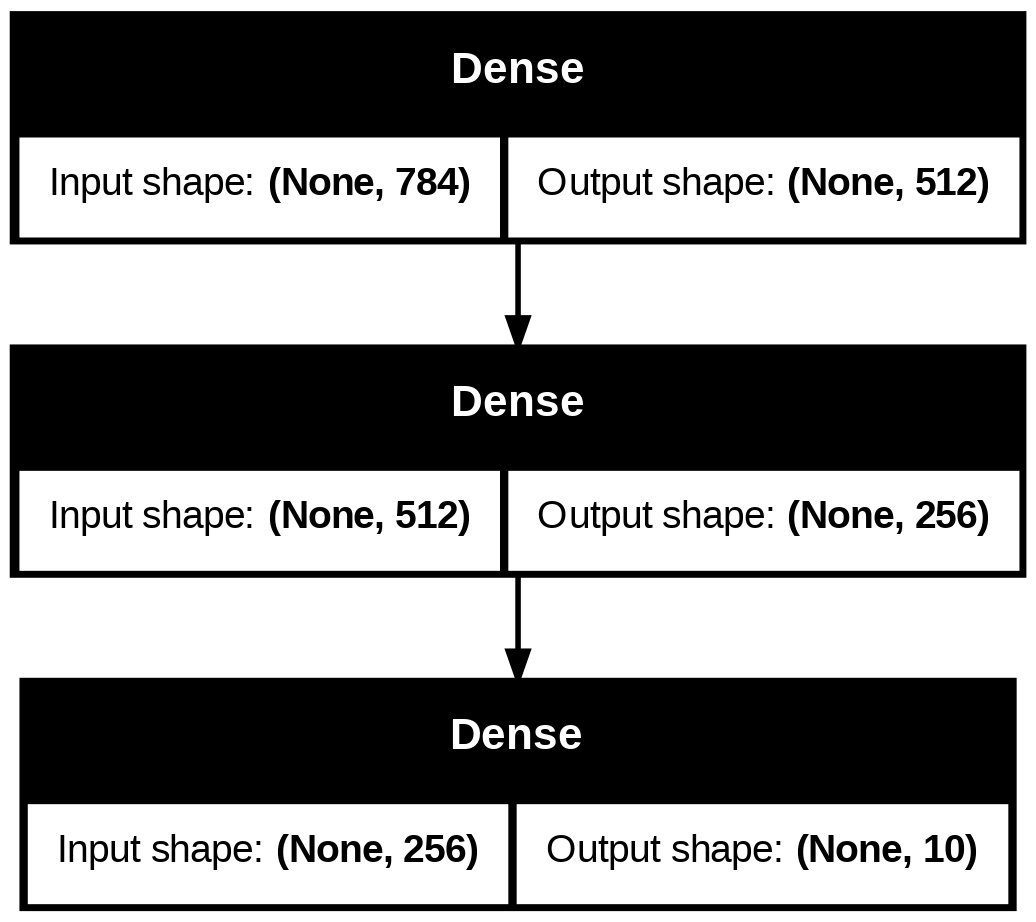

In [ ]:
keras.utils.plot_model(modelSecAPI,show_shapes=True)

In [ ]:
modelSecAPI.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 17s - 9ms/step - accuracy: 0.9444 - loss: 0.1836
Epoch 2/5
1875/1875 - 18s - 10ms/step - accuracy: 0.9746 - loss: 0.0813
Epoch 3/5
1875/1875 - 20s - 11ms/step - accuracy: 0.9836 - loss: 0.0524
Epoch 4/5
1875/1875 - 19s - 10ms/step - accuracy: 0.9874 - loss: 0.0391
Epoch 5/5
1875/1875 - 16s - 8ms/step - accuracy: 0.9889 - loss: 0.0339


In [ ]:
modelSecAPI.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9816 - loss: 0.0638


[0.063814178109169, 0.9815999865531921]

## Fuctional API

In [ ]:
#Functional API
inputs = keras.Input(shape=(28*28,))
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(256,activation='relu')(x)
outputs = layers.Dense(10,activation='softmax')(x)
modelFuncAPI = keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
modelFuncAPI.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

In [ ]:
print(modelFuncAPI.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

None


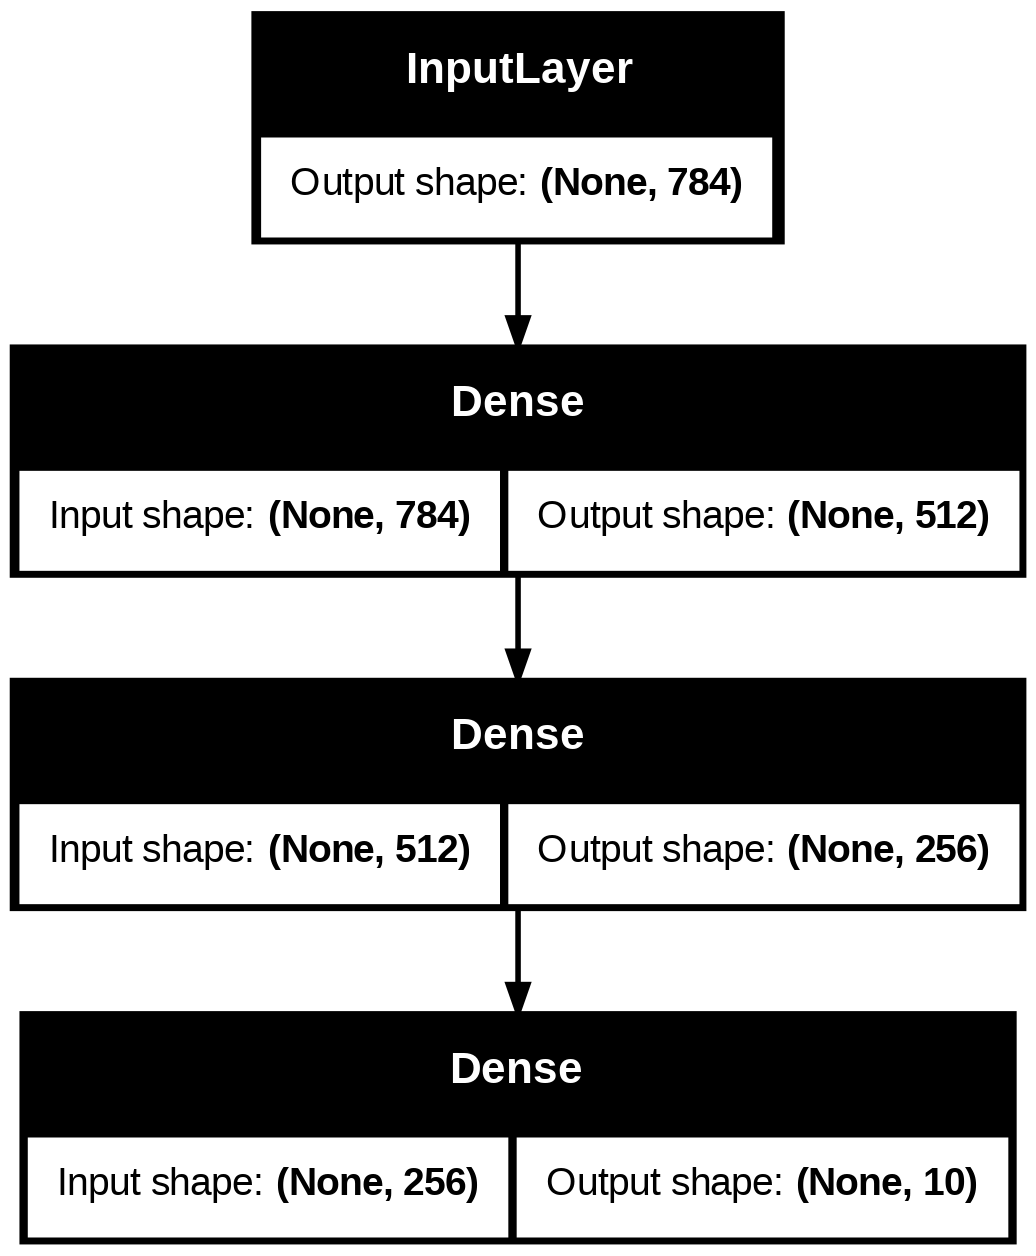

In [ ]:
keras.utils.plot_model(modelFuncAPI,show_shapes=True)

In [ ]:
modelFuncAPI.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 23s - 12ms/step - accuracy: 0.9451 - loss: 0.1830
Epoch 2/5
1875/1875 - 17s - 9ms/step - accuracy: 0.9752 - loss: 0.0781
Epoch 3/5
1875/1875 - 17s - 9ms/step - accuracy: 0.9827 - loss: 0.0547
Epoch 4/5
1875/1875 - 21s - 11ms/step - accuracy: 0.9870 - loss: 0.0390
Epoch 5/5
1875/1875 - 20s - 11ms/step - accuracy: 0.9897 - loss: 0.0317


In [ ]:
modelFuncAPI.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 2s - 6ms/step - accuracy: 0.9780 - loss: 0.0820


[0.08203131705522537, 0.9779999852180481]

## Model Subclassing

# Convolutional Neural Networks with Sequential and Functional API

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
modelSecAPI = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, 3, padding="valid", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)

In [5]:
modelSecAPI.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    metrics=["accuracy"],
)

In [6]:
print(modelSecAPI.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
modelSecAPI.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

Epoch 1/10
782/782 - 10s - 13ms/step - accuracy: 0.4064 - loss: 1.6316
Epoch 2/10
782/782 - 4s - 5ms/step - accuracy: 0.5334 - loss: 1.3110
Epoch 3/10
782/782 - 3s - 4ms/step - accuracy: 0.5865 - loss: 1.1694
Epoch 4/10
782/782 - 3s - 4ms/step - accuracy: 0.6212 - loss: 1.0784
Epoch 5/10
782/782 - 5s - 6ms/step - accuracy: 0.6485 - loss: 1.0017
Epoch 6/10
782/782 - 3s - 3ms/step - accuracy: 0.6727 - loss: 0.9349
Epoch 7/10
782/782 - 3s - 4ms/step - accuracy: 0.6934 - loss: 0.8813
Epoch 8/10
782/782 - 5s - 6ms/step - accuracy: 0.7101 - loss: 0.8420
Epoch 9/10
782/782 - 3s - 3ms/step - accuracy: 0.7235 - loss: 0.7983
Epoch 10/10
782/782 - 6s - 8ms/step - accuracy: 0.7342 - loss: 0.7658


In [8]:
modelSecAPI.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 2s - 10ms/step - accuracy: 0.6855 - loss: 0.9046


[0.904586136341095, 0.6855000257492065]

In [11]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3,padding='same',kernel_regularizer=regularizers.L2(0.01))(inputs)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3,padding='same',kernel_regularizer=regularizers.L2(0.01))(x)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, 3,padding='same',kernel_regularizer=regularizers.L2(0.01))(x)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu",kernel_regularizer=regularizers.L2(0.01))(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)
modelFuncAPI = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
modelFuncAPI.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    metrics=["accuracy"],
)

In [14]:
modelFuncAPI.fit(x_train, y_train, batch_size=64, epochs=150, verbose=2)

Epoch 1/150
782/782 - 7s - 8ms/step - accuracy: 0.3129 - loss: 3.0846
Epoch 2/150
782/782 - 3s - 4ms/step - accuracy: 0.4363 - loss: 1.9417
Epoch 3/150
782/782 - 3s - 4ms/step - accuracy: 0.4942 - loss: 1.6528
Epoch 4/150
782/782 - 4s - 5ms/step - accuracy: 0.5248 - loss: 1.5313
Epoch 5/150
782/782 - 5s - 6ms/step - accuracy: 0.5442 - loss: 1.4590
Epoch 6/150
782/782 - 5s - 7ms/step - accuracy: 0.5576 - loss: 1.4204
Epoch 7/150
782/782 - 5s - 6ms/step - accuracy: 0.5667 - loss: 1.3923
Epoch 8/150
782/782 - 3s - 4ms/step - accuracy: 0.5741 - loss: 1.3717
Epoch 9/150
782/782 - 4s - 4ms/step - accuracy: 0.5806 - loss: 1.3509
Epoch 10/150
782/782 - 3s - 4ms/step - accuracy: 0.5850 - loss: 1.3347
Epoch 11/150
782/782 - 5s - 6ms/step - accuracy: 0.5954 - loss: 1.3209
Epoch 12/150
782/782 - 6s - 7ms/step - accuracy: 0.6004 - loss: 1.2980
Epoch 13/150
782/782 - 5s - 6ms/step - accuracy: 0.6056 - loss: 1.2901
Epoch 14/150
782/782 - 3s - 4ms/step - accuracy: 0.6070 - loss: 1.2865
Epoch 15/150
78

In [15]:
modelFuncAPI.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 2s - 12ms/step - accuracy: 0.7333 - loss: 1.1116


[1.111561894416809, 0.733299970626831]

# RNNs, GRUs, LSTMs and Bidirectionality

In [16]:
from tensorflow.keras.datasets import mnist

In [17]:
(x_train,y_train) ,(x_test,y_test) = mnist.load_data()
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [23]:
model = keras.Sequential()

model.add(keras.Input(shape=(None,28)))
model.add(layers.SimpleRNN(512,return_sequences=True,activation='relu'))
model.add(layers.SimpleRNN(512,activation='relu'))
model.add(layers.Dense(10))

In [24]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, None, 512)      │       276,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 806,922 (3.08 MB)

 Trainable params: 806,922 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [26]:
model.fit(x_train, y_train, batch_size=64, epochs=20,verbose=2)

Epoch 1/20
938/938 - 16s - 17ms/step - accuracy: 0.8977 - loss: 0.3272
Epoch 2/20
938/938 - 11s - 11ms/step - accuracy: 0.9622 - loss: 0.1376
Epoch 3/20
938/938 - 11s - 11ms/step - accuracy: 0.9672 - loss: 0.1237
Epoch 4/20
938/938 - 20s - 22ms/step - accuracy: 0.9682 - loss: 0.1156
Epoch 5/20
938/938 - 21s - 22ms/step - accuracy: 0.9743 - loss: 0.0965
Epoch 6/20
938/938 - 20s - 22ms/step - accuracy: 0.9766 - loss: 0.0866
Epoch 7/20
938/938 - 11s - 11ms/step - accuracy: 0.9771 - loss: 0.0853
Epoch 8/20
938/938 - 20s - 22ms/step - accuracy: 0.9790 - loss: 0.0766
Epoch 9/20
938/938 - 20s - 22ms/step - accuracy: 0.9776 - loss: 0.0827
Epoch 10/20
938/938 - 21s - 22ms/step - accuracy: 0.9803 - loss: 0.0706
Epoch 11/20
938/938 - 11s - 11ms/step - accuracy: 0.9825 - loss: 0.0649
Epoch 12/20
938/938 - 11s - 11ms/step - accuracy: 0.9821 - loss: 0.0672
Epoch 13/20
938/938 - 21s - 22ms/step - accuracy: 0.9801 - loss: 0.0726
Epoch 14/20
938/938 - 20s - 22ms/step - accuracy: 0.9863 - loss: 0.0513
E

In [27]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 2s - 12ms/step - accuracy: 0.9795 - loss: 0.0866


[0.08660094439983368, 0.9794999957084656]

## LSTM

In [28]:
model = keras.Sequential()

model.add(keras.Input(shape=(None,28)))
model.add(layers.LSTM(256,return_sequences=True,activation='tanh'))
model.add(layers.LSTM(256,activation='tanh'))
model.add(layers.Dense(10))
print(model.summary())
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 256)      │       291,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 819,722 (3.13 MB)

 Trainable params: 819,722 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None


In [29]:
model.fit(x_train, y_train, batch_size=64, epochs=20,verbose=2)

Epoch 1/20
938/938 - 11s - 12ms/step - accuracy: 0.9000 - loss: 0.3058
Epoch 2/20
938/938 - 8s - 8ms/step - accuracy: 0.9739 - loss: 0.0860
Epoch 3/20
938/938 - 10s - 11ms/step - accuracy: 0.9819 - loss: 0.0596
Epoch 4/20
938/938 - 10s - 11ms/step - accuracy: 0.9861 - loss: 0.0449
Epoch 5/20
938/938 - 10s - 11ms/step - accuracy: 0.9879 - loss: 0.0391
Epoch 6/20
938/938 - 11s - 12ms/step - accuracy: 0.9900 - loss: 0.0330
Epoch 7/20
938/938 - 10s - 10ms/step - accuracy: 0.9917 - loss: 0.0274
Epoch 8/20
938/938 - 10s - 11ms/step - accuracy: 0.9926 - loss: 0.0247
Epoch 9/20
938/938 - 10s - 11ms/step - accuracy: 0.9935 - loss: 0.0211
Epoch 10/20
938/938 - 10s - 11ms/step - accuracy: 0.9939 - loss: 0.0188
Epoch 11/20
938/938 - 8s - 8ms/step - accuracy: 0.9944 - loss: 0.0179
Epoch 12/20
938/938 - 8s - 8ms/step - accuracy: 0.9954 - loss: 0.0153
Epoch 13/20
938/938 - 10s - 11ms/step - accuracy: 0.9953 - loss: 0.0146
Epoch 14/20
938/938 - 10s - 11ms/step - accuracy: 0.9960 - loss: 0.0124
Epoch 1

In [31]:
model.evaluate(x_test, y_test, batch_size=2, verbose=2)

5000/5000 - 19s - 4ms/step - accuracy: 0.9902 - loss: 0.0427


[0.042721331119537354, 0.9901999831199646]